Óscar Cigala Álvarez
alu0101038230@ull.edu.es
Ejercicios día 4

# Ejercicios teóricos

### Ejercicio 1
¿Qué consigues con groupby?

Agrupar los datos según un criterio

### Ejercicio 2
¿Por qué es importante una buena visualizción?

Porque el objetivo principal de la visualización de datos es comunicar información o ideas complejas de forma clara, precisa y eficiente, de forma que ayude a los usuarios a analizar y razonar sobre datos y evidencias.


### Ejercicio 3
¿Con qué línea de código muestro una gráfica de barras? ¿Y una de queso?

barras: plt.bar()
queso: plt.pie()

### Ejercicio 4
¿Cómo hacer un bot de Telegram? Haz una lista de pasos generales, no quiero que me hables de código. 


# Ejercicios prácticos

### Ejercicio 8 del día 3

Agrupa por media por year, month y esta vez también day. Una vez hecho eso muestra la media de generación eólica para el día 3 de junio de 2015

In [ ]:
import pandas as pd

# Con index_col 0 obviamos que la primera columna no tiene nombre. Esa columna es la numeración de las filas.
datos = pd.read_csv('https://raw.githubusercontent.com/SerDiaz/Introduccion_programacion_en_python/main/dia3/REE_hist_Tenerife.csv', sep=',', index_col=0) 

#print(datos)
datos

,cc,day,dem,die,ele,em_cc,em_die,em_ele,em_gas,em_vap,eol,fecha,fot,gas,hid,hour,minute,month,pre,pro,vap,week,year
0,260.2,31,546.4,38.0,0.0,26.02,4.116667,0.0,8.0784,29.430,9.6,2012-12-31 20:00:00,0.0,43.2,0.0,20,0,12,551.0,539.6,196.2,1,2012
1,259.2,31,544.8,38.0,0.0,25.92,4.116667,0.0,7.8166,29.325,10.2,2012-12-31 20:10:00,0.0,41.8,0.0,20,10,12,545.1,539.6,195.5,1,2012
2,256.2,31,540.3,38.0,0.0,25.62,4.116667,0.0,7.6109,29.265,9.7,2012-12-31 20:20:00,0.0,40.7,0.0,20,20,12,540.7,539.6,195.1,1,2012
3,253.4,31,535.1,38.0,0.0,25.34,4.116667,0.0,7.5548,29.205,9.2,2012-12-31 20:30:00,0.0,40.4,0.0,20,30,12,537.8,539.6,194.7,1,2012
4,248.6,31,531.2,38.0,0.0,24.86,4.116667,0.0,7.2930,29.100,11.6,2012-12-31 20:40:00,0.0,39.0,0.0,20,40,12,536.2,539.6,194.0,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,154.0,18,338.9,37.8,0.0,15.40,4.095000,0.0,1.6082,17.925,19.4,2020-10-18 23:00:00,0.0,8.6,0.0,23,0,10,343.4,330.3,119.5,42,2020
344,160.9,18,329.2,37.9,0.0,16.09,4.105833,0.0,0.2805,16.290,20.0,2020-10-18 23:10:00,0.0,1.5,0.0,23,10,10,335.3,330.3,108.6,42,2020
345,156.8,18,325.5,38.2,0.0,15.68,4.138333,0.0,0.0000,16.695,17.5,2020-10-18 23:20:00,0.0,0.0,0.0,23,20,10,328.1,330.3,111.3,42,2020
346,156.5,18,319.9,37.8,0.0,15.65,4.095000,0.0,0.0000,16.725,13.8,2020-10-18 23:30:00,0.0,0.0,0.0,23,30,10,321.7,330.3,111.5,42,2020


In [ ]:
## Resolver

media_año_mes_dia = datos.groupby(['month', 'year', 'day'], as_index=False).mean()
media_eol = media_año_mes_dia.loc[:, ['eol', 'month', 'year', 'day']]
media_eol[(media_año_mes_dia['month'] == 6) & (media_año_mes_dia['year'] == 2015) & (media_año_mes_dia['day'] == 3)]

,eol,month,year,day
1272,4.225,6,2015,3


In [ ]:
import pandas as pd

# Acuérdense que por defecto se va a separar por comas al leer el csv si no se le indica nada

# datos = pd.read_csv('owid-covid-data.csv', sep=',') 
datos = pd.read_csv('https://raw.githubusercontent.com/SerDiaz/Introduccion_programacion_en_python/main/dia4/owid-covid-data.csv') 

datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59916,NaN,NaN,International,2020-11-26,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59917,NaN,NaN,International,2020-11-27,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59918,NaN,NaN,International,2020-11-28,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59919,NaN,NaN,International,2020-11-29,721.0,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ejercicio 1 
Visualizar la evolución no de los casos totales sino de los casos nuevos de España mediante un gráfico de líneas.

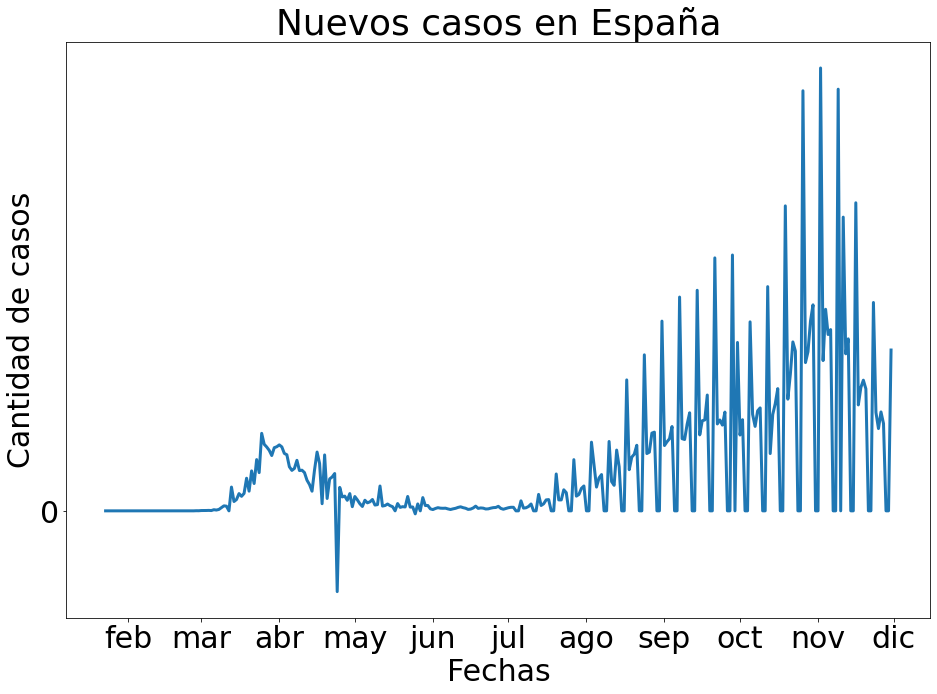

In [ ]:
## Resolver

datos['date'] =  pd.to_datetime(datos['date'], format='%Y-%m-%d') # Transformamos formato datos
datos_españa = datos[datos['location'] == 'Spain'] # Reasignamos de nuevos los datos de España, ahora con el formato del tiempo como datetime
# Imprimos y observamos que ya el dtype es diferente
type(datos_españa['date'].iloc[0])
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 30.0

x = datos_españa['date']
y = datos_españa['new_cases']

fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de casos') # nombre eje y
ax.set_title('Nuevos casos en España') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

ax.set_yticks([0,500000,1000000,1500000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill'])

plt.plot(x, y, lw=3)
plt.show()
fig.savefig("total_es_mes.png")

### Ejercicio 2 
Ahora hacer lo mismo pero para los casos nuevos y no los totales, con todos los países

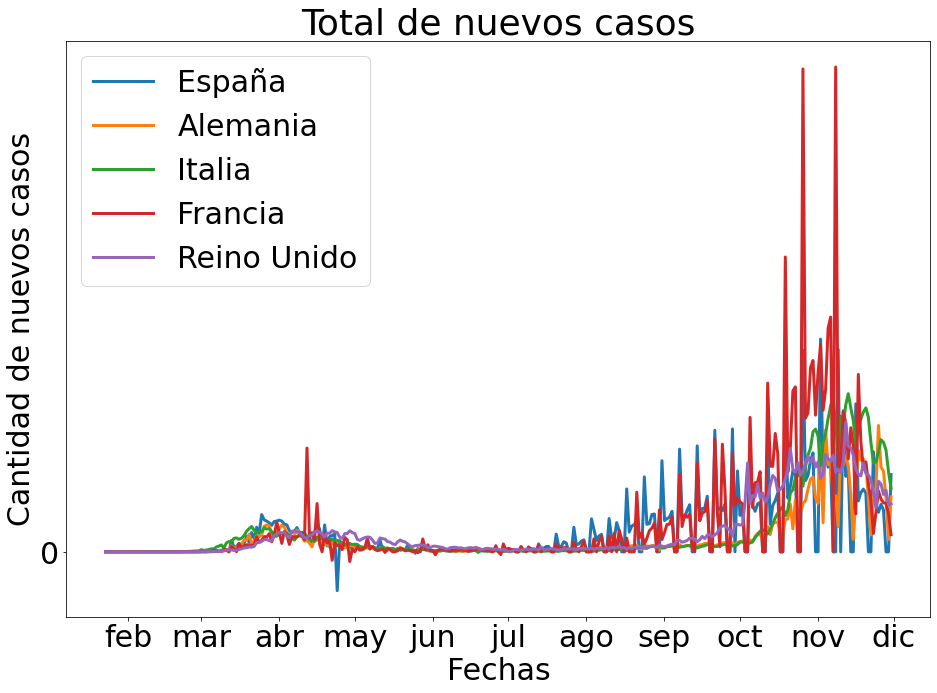

In [ ]:
## Resolver
datos_italia = datos[datos['location'] == 'Italy']
datos_alemania = datos[datos['location'] == 'Germany']
datos_francia = datos[datos['location'] == 'France']
datos_reinoUnido = datos[datos['location'] == 'United Kingdom']
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0

x_es = datos_españa['date']
x_it = datos_italia['date']
x_ger = datos_alemania['date']
x_fr = datos_francia['date']
x_uk = datos_reinoUnido['date']

y_es = datos_españa['new_cases']
y_it = datos_italia['new_cases']
y_ger = datos_alemania['new_cases']
y_fr = datos_francia['new_cases']
y_uk = datos_reinoUnido['new_cases']

fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Fechas') # nombre eje x 
ax.set_ylabel('Cantidad de nuevos casos') # nombre eje y
ax.set_title('Total de nuevos casos') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

ax.set_yticks([0,500000,1000000,1500000, 2000000])
ax.set_yticklabels(['0','500 mil','1 mill', '1.5 mill', '2 mill'])

plt.plot(x_es, y_es, lw=3,label = "España")
plt.plot(x_ger, y_ger, lw=3,label = "Alemania")
plt.plot(x_it, y_it, lw=3,label = "Italia")
plt.plot(x_fr, y_fr, lw=3,label = "Francia")
plt.plot(x_uk, y_uk, lw=3,label = "Reino Unido")
plt.legend()

plt.show()
fig.savefig("total_paises.png") # Calidad resolucion

### Ejercicio 3
Ahora hacer lo mismo pero para los casos nuevos con una gráfica de barras pero con Estados Unidos en vez de España

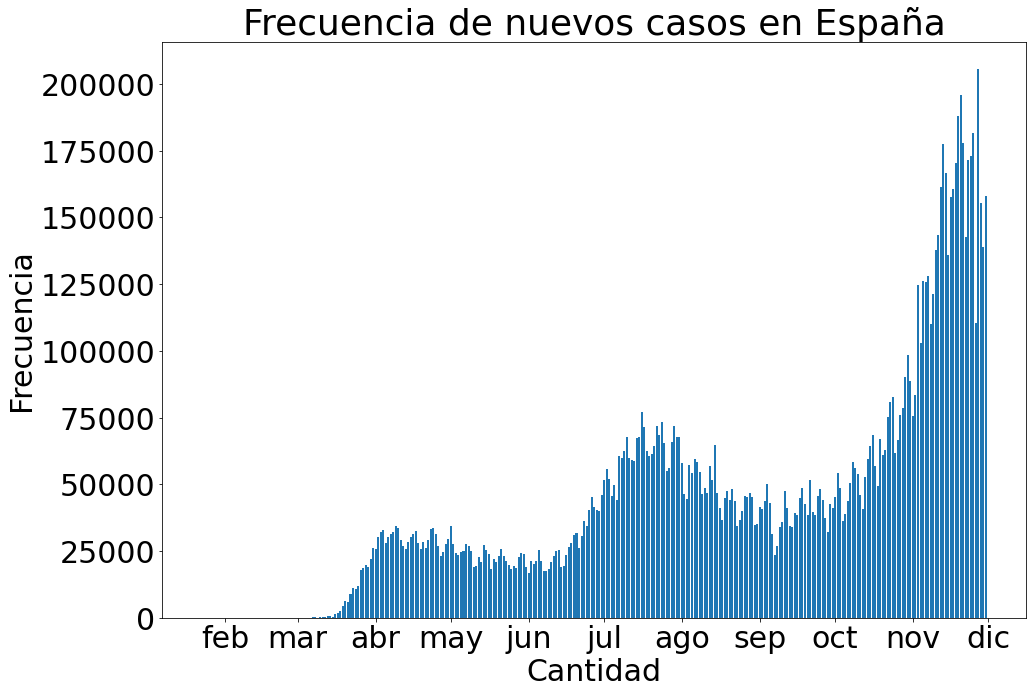

In [ ]:
## Resolver
# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

datos_est = datos[datos['location'] == 'United States']
mpl.rcParams['font.size'] = 30.0

x = datos_est['date']
y = datos_est['new_cases']

fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Cantidad') # nombre eje x 
ax.set_ylabel('Frecuencia') # nombre eje y
ax.set_title('Frecuencia de nuevos casos en España') # nombre gráfica

ax.set_xticklabels(['feb','mar','abr','may','jun',
                    'jul','ago','sep','oct','nov', 'dic'])

plt.bar(x, y)
plt.show()

### Ejercicio 4 

Ahora hacer una gráfica de queso para los casos totales sólo de America del Sur.

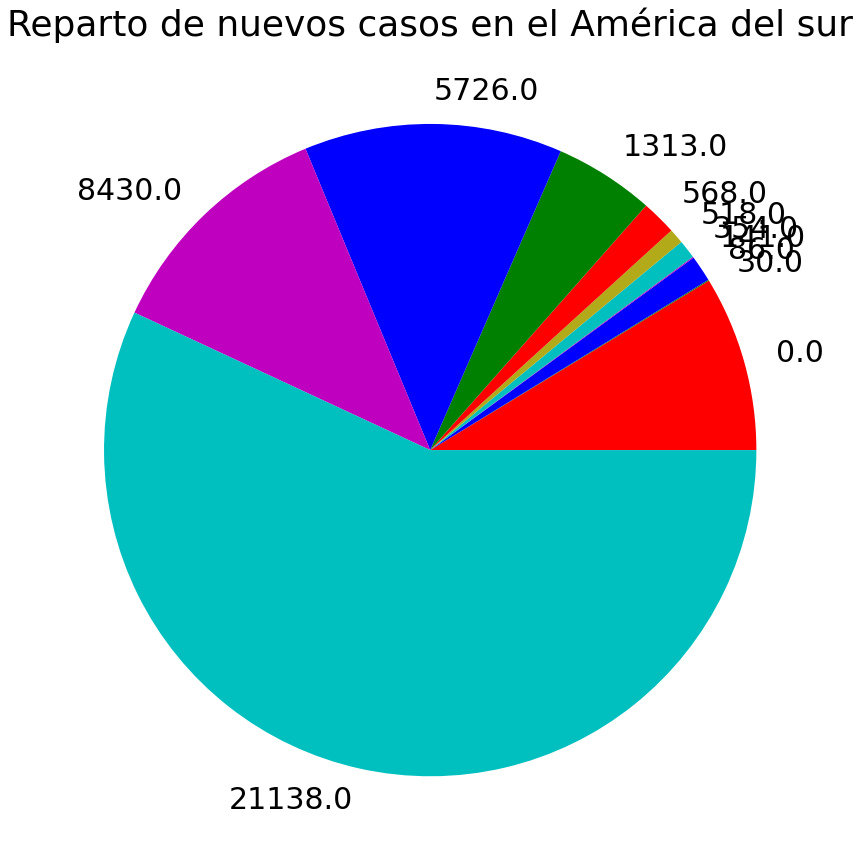

In [ ]:
## Resolver
cond_dia = datos['date'].dt.day == 30
cond_mes = datos['date'].dt.month == 11
cond_año = datos['date'].dt.year == 2020
datos_ayer = datos[(cond_dia) & (cond_mes) & (cond_año) & (datos['continent'] == 'South America')]
datos_ayer['date']

per_cont = datos_ayer.groupby('new_cases').sum()
per_cont
# Gráficas de queso
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 30.0

values = per_cont.total_cases
colors = ['r', 'g', 'b', 'm', 'c','#B3AA19']
labels = per_cont.index
plt.pie(values, colors= colors, labels=labels)
fig = plt.gcf()
fig.set_size_inches(15,15) # Para cambiar el tamaño

plt.title('Reparto de nuevos casos en el América del sur')
plt.show()
fig.savefig("reparto_queso.png") # Calidad resolucion

### Ejercicio 5
Queremos lo mismo de la gráfica de puntos que vimos pero queremos ver la evolución de casos totales con puntos de junio, julio y agosto

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


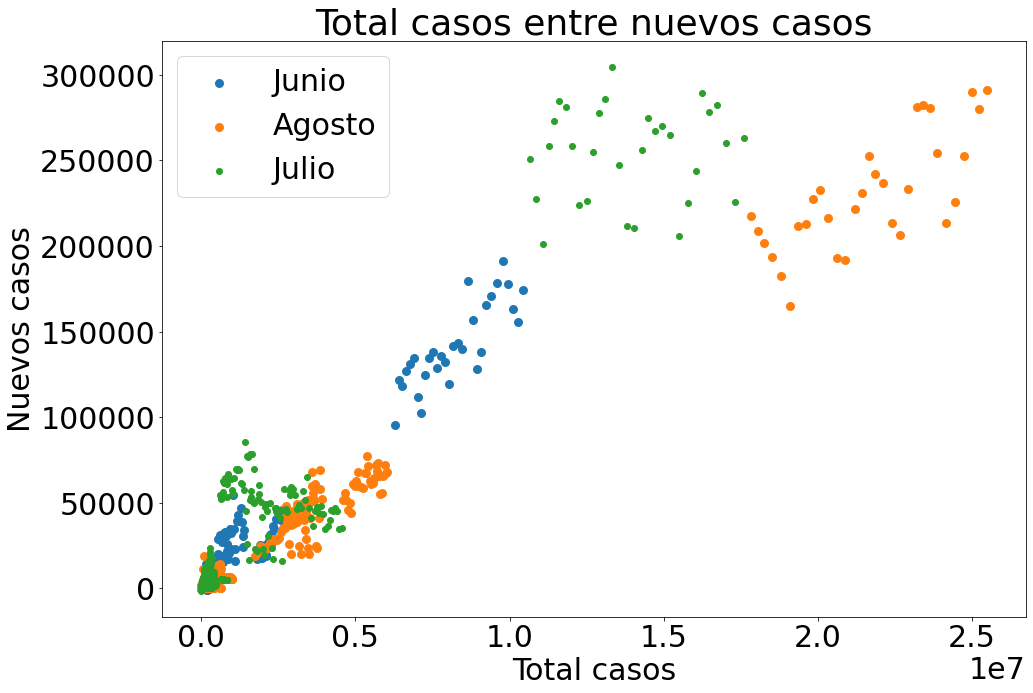

In [ ]:
## Resolver
cond_mes = datos['date'].dt.month == 6
cond_mes2 = datos['date'].dt.month == 8
cond_mes3 = datos['date'].dt.month == 7

datos_intervalo = datos[(cond_mes) | (cond_mes2) | (cond_mes3)]

datos_junio = datos_intervalo[cond_mes]
datos_agosto = datos_intervalo[cond_mes2]
datos_julio = datos_intervalo[cond_mes3]


# Librería matplotlib que vamos a utilizar para representar graficamente
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 30.0


casjun = datos_junio['total_cases']
newJun = datos_junio['new_cases']

casag = datos_agosto['total_cases']
newAg = datos_agosto['new_cases']

casjul = datos_julio['total_cases']
newJul = datos_julio['new_cases']


fig = plt.figure()
ax = fig.add_axes([1, 1, 2, 2]) # main axes

ax.set_xlabel('Total casos') # nombre eje x 
ax.set_ylabel('Nuevos casos') # nombre eje y
ax.set_title('Total casos entre nuevos casos') # nombre gráfica


ax.scatter(casjun, newJun, lw=3,label = "Junio")
ax.scatter(casag, newJul, lw=3,label = "Agosto")
ax.scatter(casjul, newAg, label = "Julio")
plt.legend()

plt.show()



### Ejercicio 6 
Añadir a la esta gráfica que acabamos de ver de Plotly: Reino Unido, Francia, Alemnania, Dinamarca y Bélgica

In [ ]:
# Resolver

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly as ply
from plotly import subplots


datos_españa = datos[datos['location'] == 'Spain']
datos_italia = datos[datos['location'] == 'Italy']
datos_reinoUnido = datos[datos['location'] == 'United Kingdom']
datos_francia = datos[datos['location'] == 'France']
datos_alemania = datos[datos['location'] == 'Germany']
datos_dinamarca = datos[datos['location'] == 'Denmark']
datos_belgica = datos[datos['location'] == 'Belgium']

x_es = datos_españa['date']
y_es = datos_españa['total_cases']

x_it = datos_italia['date']
y_it = datos_italia['total_cases']

x_uk = datos_reinoUnido['date']
y_uk = datos_reinoUnido['total_cases']

x_fr = datos_francia['date']
y_fr = datos_francia['total_cases']

x_gr = datos_alemania['date']
y_gr = datos_alemania['total_cases']

x_dn = datos_dinamarca['date']
y_dn = datos_dinamarca['total_cases']

x_bl = datos_belgica['date']
y_bl = datos_belgica['total_cases']

# Create traces
trace0 = go.Scatter(
    x = x_es,
    y = y_es,
    mode = 'lines',
    name = 'Total casos España'
)
trace1 = go.Scatter(
    x = x_it,
    y = y_it,
    mode = 'lines',
    name = 'Total casos Italia'
)

trace2 = go.Scatter(
    x = x_uk,
    y = y_uk,
    mode = 'lines',
    name = 'Total casos Reino Unido'
)

trace3 = go.Scatter(
    x = x_fr,
    y = y_fr,
    mode = 'lines',
    name = 'Total casos Francia'
)

trace4 = go.Scatter(
    x = x_gr,
    y = y_gr,
    mode = 'lines',
    name = 'Total casos Alemania'
)

trace5 = go.Scatter(
    x = x_dn,
    y = y_dn,
    mode = 'lines',
    name = 'Total casos Dinamarca'
)

trace6 = go.Scatter(
    x = x_bl,
    y = y_bl,
    mode = 'lines',
    name = 'Total casos Belgica'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]

iplot(data)

### Ejercicio 7
Añadir más frases al bot de Telegram:

- Que te conteste "Buenos días" si tu le dices buenos días
- Que al decirle "Hasta luego" también te diga adiós 

In [ ]:
## Resolver


#Importar librerias
import json

# Creamos el objeto telepot 
bot = telepot.Bot(TOKEN) 
 
def update(offset):
    '''
      Llamar al metodo getUpdates del bot, utilizando un offset
      :param offset: Esto indica el primer mensaje que quieres recibir
      :return: respuesta
    '''
    respuesta = bot.getUpdates(offset=offset)
 
    #Devolver este respuesta
    return respuesta
 
 
def leer_mensaje():
    '''
      Lee el mensaje que se le ha enviado al bot
      :return id_chat: Id del chat
      :return persona: nombre
    '''
    # Obtnemos el último mensaje
    mensaje = update(0)[-1]
    #Extraer el texto, nombre de la persona e id del último mensaje recibido
    #Recoger la info del mensaje (remitente, id del chat e id del mensaje)
    texto = mensaje["message"]["text"]
    persona = mensaje["message"]["from"]["first_name"]
    id_chat = mensaje["message"]["chat"]["id"]

    #Devolver toda la informacion
    return texto, id_chat, persona
 
def enviar_mensaje(idchat, texto):
    '''
      Llamar el metodo sendMessage del bot, 
      passando foto, el texto y la id del chat
      :param idchat: el id del chat, número
      :param texto: el texto a enviar
    '''
    bot.sendMessage(idchat, texto)
 
#Llamar a la funcion "leer_mensaje()"
texto, idchat, nombre = leer_mensaje()

#Generar una respuesta a partir de la informacion del mensaje
if "hola" in texto.lower():
    texto_respuesta = "¡Buenas " + nombre + "!"
    enviar_mensaje(idchat, texto_respuesta)
elif ("adios" in texto.lower()
      or "adios" in texto.lower()):
    texto_respuesta = "Hasta pronto"
    enviar_mensaje(idchat, texto_respuesta)
elif ("Como te llamas" in texto.lower()
      or "Cual es tu nombre" in texto.lower()):
    texto_respuesta = "Me llamo Botsillo"
    enviar_mensaje(idchat, texto_respuesta)
elif ("que eres" in texto.lower()
      or "que eres" in texto.lower()):
    texto_respuesta = "Soy un bot creado en un curso de python"
    enviar_mensaje(idchat, texto_respuesta)
else:
    texto_respuesta = "No entiendo que me has dicho, podrías repetirlo?"
    enviar_mensaje(idchat, texto_respuesta)
